# Modelling and sampling densities

In [23]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import gamma
from theta.rtbm import RTBM
from theta.minimizer import CMA
from theta.costfunctions import logarithmic
import matplotlib.pyplot as plt
%matplotlib inline

## Generate data from known density

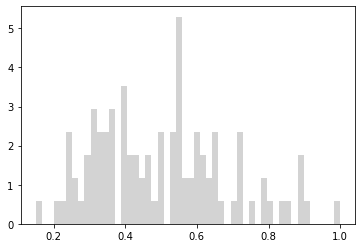

In [32]:
samples = 100
np.random.seed(0)
data = gamma.rvs(7.5, scale=1, size=samples).reshape(1,-1)
data = np.select([np.abs(data) < 20], data)
data = data / np.max(data)
plt.hist(data.T, bins=50, density=True, color="lightgray", label='input sample');

## Training the RTBM

In [33]:
model = RTBM(1, 2, init_max_param_bound=50, random_bound=1)

In [34]:
optimizer = CMA()
solution = optimizer.train(logarithmic, model, data, tolfun=1e-1)

CMA on 1 cpu(s) enabled
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 9 (seed=666659, Sat Nov 28 12:27:22 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 2.139415627452588e+01 1.0e+00 5.40e+00  5e+00  6e+00 0:00.0
    2     20 1.658072735111648e+01 1.1e+00 5.71e+00  5e+00  6e+00 0:00.1
    3     30 8.381787929158365e+00 1.3e+00 5.80e+00  6e+00  6e+00 0:00.1
  100   1000 -2.982650739154452e+01 2.1e+01 1.58e+00  7e-01  2e+00 0:03.1
  153   1530 -3.044454302851792e+01 3.7e+01 5.68e-01  9e-02  6e-01 0:04.6
CMAEvolutionStrategyResult(xbest=array([-21.88331174,   0.59802132,   2.14963063,  14.83090132,
        20.26582946,  49.90047415,  21.25397055,   9.96310993,
        49.99971408]), fbest=-30.44454302851792, evals_best=1526, evaluations=1530, iterations=153, xfavorite=array([-21.88002972,   0.45990748,   2.55151609,  14.80814107,
        20.16333225,  49.84202983,  20.97583775,   9.483411  ,
        49.94551525]), stds=array([0.08843506, 0.20

## Use RTBM to sample

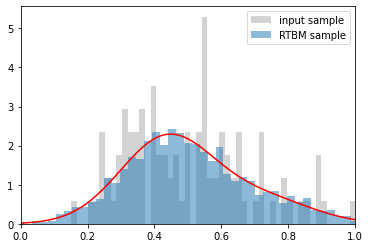

In [35]:
np.random.seed(2)
test_data = (np.linspace(0, 1, 100)).reshape(1, -1)
plt.hist(data.T, bins=50, density=True, color="lightgray", label='input sample')
plt.plot(test_data.flatten(), model(test_data).flatten(), 'r-')
plt.hist(model.make_sample(2000)[0], density=True, bins=50, alpha=0.5, label='RTBM sample');
plt.xlim([0,1]);
plt.legend()